# Linear Regression 

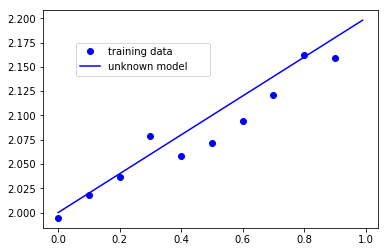

In [27]:
#Import the python libraries that will be used
import numpy as np  #Arithmetical operations
import matplotlib.pyplot as plt # Plot figures
import pandas as pd 



#Defining the model f(x)=a*x+b(a=0.2, b=2)
x2 = np.arange(0.0, 1.0, 0.01)
def f(x,a,b):
    return a*x+b

#Generate the training set (x_train,y_train) y_train=f(x_train,a,b)+noise
a=0.2
b=2
x_train = np.arange(0.0, 1.0, 0.1)
y_train = f(x_train,a,b) + np.random.normal(0,0.02,len(x_train)) #y_train contains noisy versions of the model

#Plot training data and the linear model
plt.plot(x_train,y_train,'bo',label='training data')
plt.plot(x2,f(x2,a,b),'b',label='unknown model')
plt.legend(bbox_to_anchor=(0.1, .7, .4, .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
plt.show()


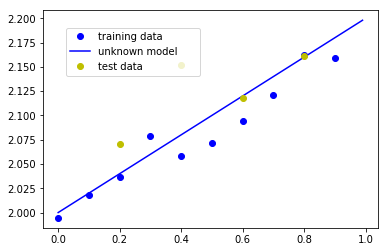

In [28]:
#Generate test data
x_test = np.arange(0.2, 1.0, 0.2)
y_test = f(x_test,a,b) + np.random.normal(0,0.03,len(x_test))

#Plot test data
plt.plot(x_train,y_train,'bo', label="training data")
plt.plot(x2,f(x2,a,b),'b',label="unknown model")
plt.plot(x_test,y_test,'yo',label="test data" )
plt.legend(bbox_to_anchor=(0.07, .7, .4, .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
plt.show()

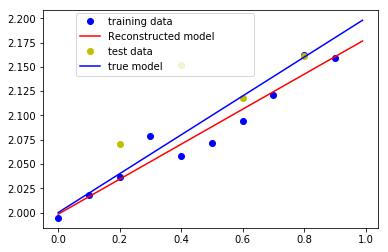

,
$\theta_0$,1.998336
$\theta_1$,0.180075


In [29]:
# Fitting the model
# Model assumption 
#y = theta[1]*x + theta[0]

# Formation of matrix X
X = x_train

arr_ones =np.ones((10,1))
X = X.reshape(10,1)
X = np.hstack((arr_ones,X))
#Least Squares (LS) estimate of parameter theta: theta=inverse(X'*X)*(X'*y)
Xinv = np.linalg.inv(np.dot(X.T,X));
theta = np.dot(Xinv,X.T).dot(y_train)

#Generate pairs (x,y) based on the estimated model
x3 = x2.reshape(100,1);
b_ones =np.ones((100,1))
X3 = np.hstack((b_ones,x3))
y_recon = X3.dot(theta)

#Plot training, test data, true and reconstructed model
plt.plot(x_train,y_train,'bo',label='training data')
plt.plot(x2,y_recon,'r',label='Reconstructed model')
plt.plot(x_test,y_test,'yo',label='test data')
plt.plot(x2,f(x2,a,b),'b',label='true model')
plt.legend(bbox_to_anchor=(0.1, .7, .53, .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
plt.show()
name1 = ["$\theta_0$","$\theta_1$"]
pd.DataFrame(theta,name1,[""])


# Linear Classification 

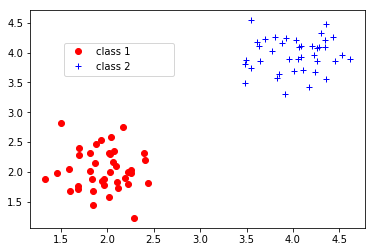

In [30]:

#Generate training samples of two classes X1 and X2
X1 = np.random.multivariate_normal([2,2],[[0.1, 0],[0,0.1]],40)
X2 = np.random.multivariate_normal([4,4],[[0.1, 0],[0,0.1]],40)
#Plot the training samples
plt.plot(X1[:,0],X1[:,1],'ro', label ='class 1' )
plt.plot(X2[:,0],X2[:,1],'b+', label = 'class 2')
plt.legend(bbox_to_anchor=(0.1, .7, .33, .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
plt.show()

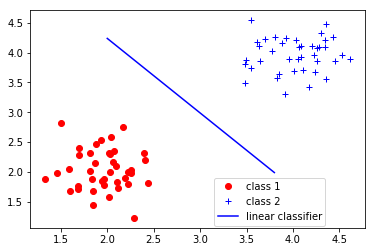

In [31]:
#Least squares linear classifier
Xa = np.vstack((X1,X2))
arr_ones =np.ones((80,1))
X = np.hstack((arr_ones,Xa))
# generate vector y which contains the labels of the classes i.e. -1 for X1 and 1 for X2
y = np.array([-1]*40 + [1]*40)
#Estimate theta: theta=inverse(X'*X)*X'*y
Xinv = np.linalg.inv(np.dot(X.T,X));
theta = np.dot(Xinv,X.T).dot(y)

#Plot the line classifier: theta1*x1+theta2*x2+theta0=0 
x11 = np.arange(2, 4.0, 0.2)
x12 = - theta[0]/theta[2] - (theta[1]/theta[2])*x11
#Plot classifier
plt.plot(X1[:,0],X1[:,1],'ro', label='class 1')
plt.plot(X2[:,0],X2[:,1],'b+', label='class 2')
plt.plot(x11,x12,'b',label='linear classifier')
plt.legend(bbox_to_anchor=(0.55, .01, .33, .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
plt.show()
